In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('plot_style_mk.mplstyle')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = ['navy','brown','royalblue'])
RSEED = 42
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Loading the clean data

In [45]:
file = 'Clean rent data_Hamburg.csv'
df = pd.read_csv(file)
df.head()

,Area ($m^2$),Number of rooms,Latitude,Longitude,Rent (in eur)
0,45.43,1.0,53.571509,10.012736,995.0
1,51.86,2.0,53.483600,10.125000,1135.0
2,45.64,2.0,53.492292,9.996217,1118.0
3,52.07,2.0,53.542913,9.995835,1275.0
4,57.25,2.0,53.596390,10.003832,1374.0


In [46]:
df.shape

(858, 5)

In [47]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area ($m^2$)     858 non-null    float64
 1   Number of rooms  858 non-null    float64
 2   Latitude         858 non-null    float64
 3   Longitude        858 non-null    float64
 4   Rent (in eur)    858 non-null    float64
dtypes: float64(5)
memory usage: 33.6 KB


data types looks fine, no null values which is perfect

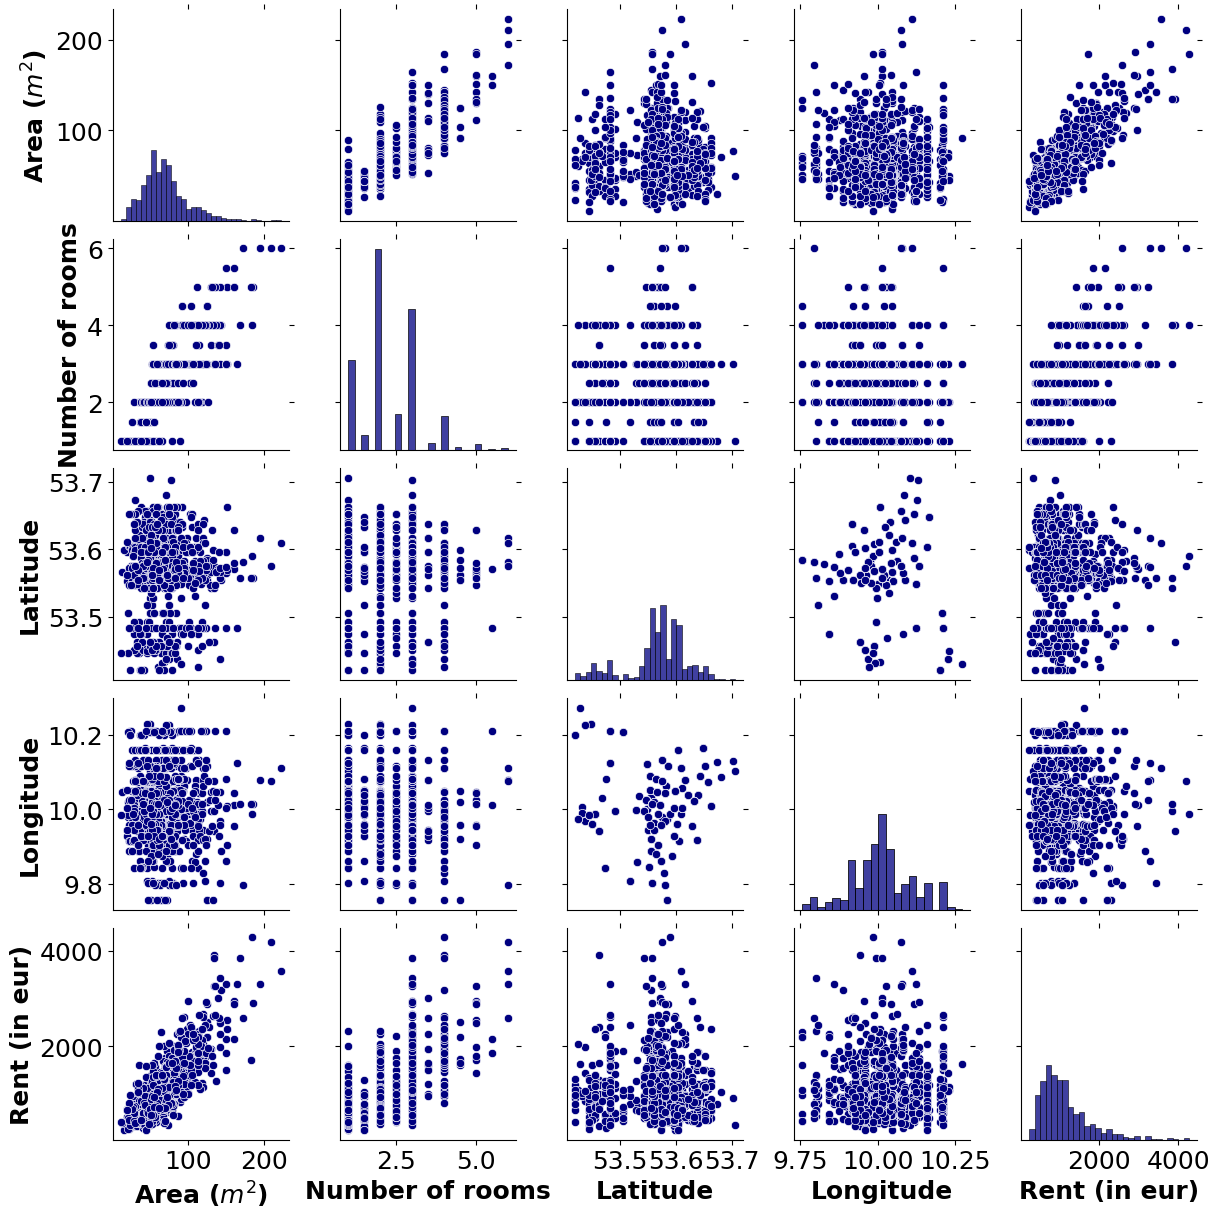

In [48]:
#pairplot
sns.pairplot(df)

- Only area has linear relation with Rent. Not latutude and Longitude
- Number of rooms is a catagorical variable, not a numerical variable. So it can't be treated as other variables

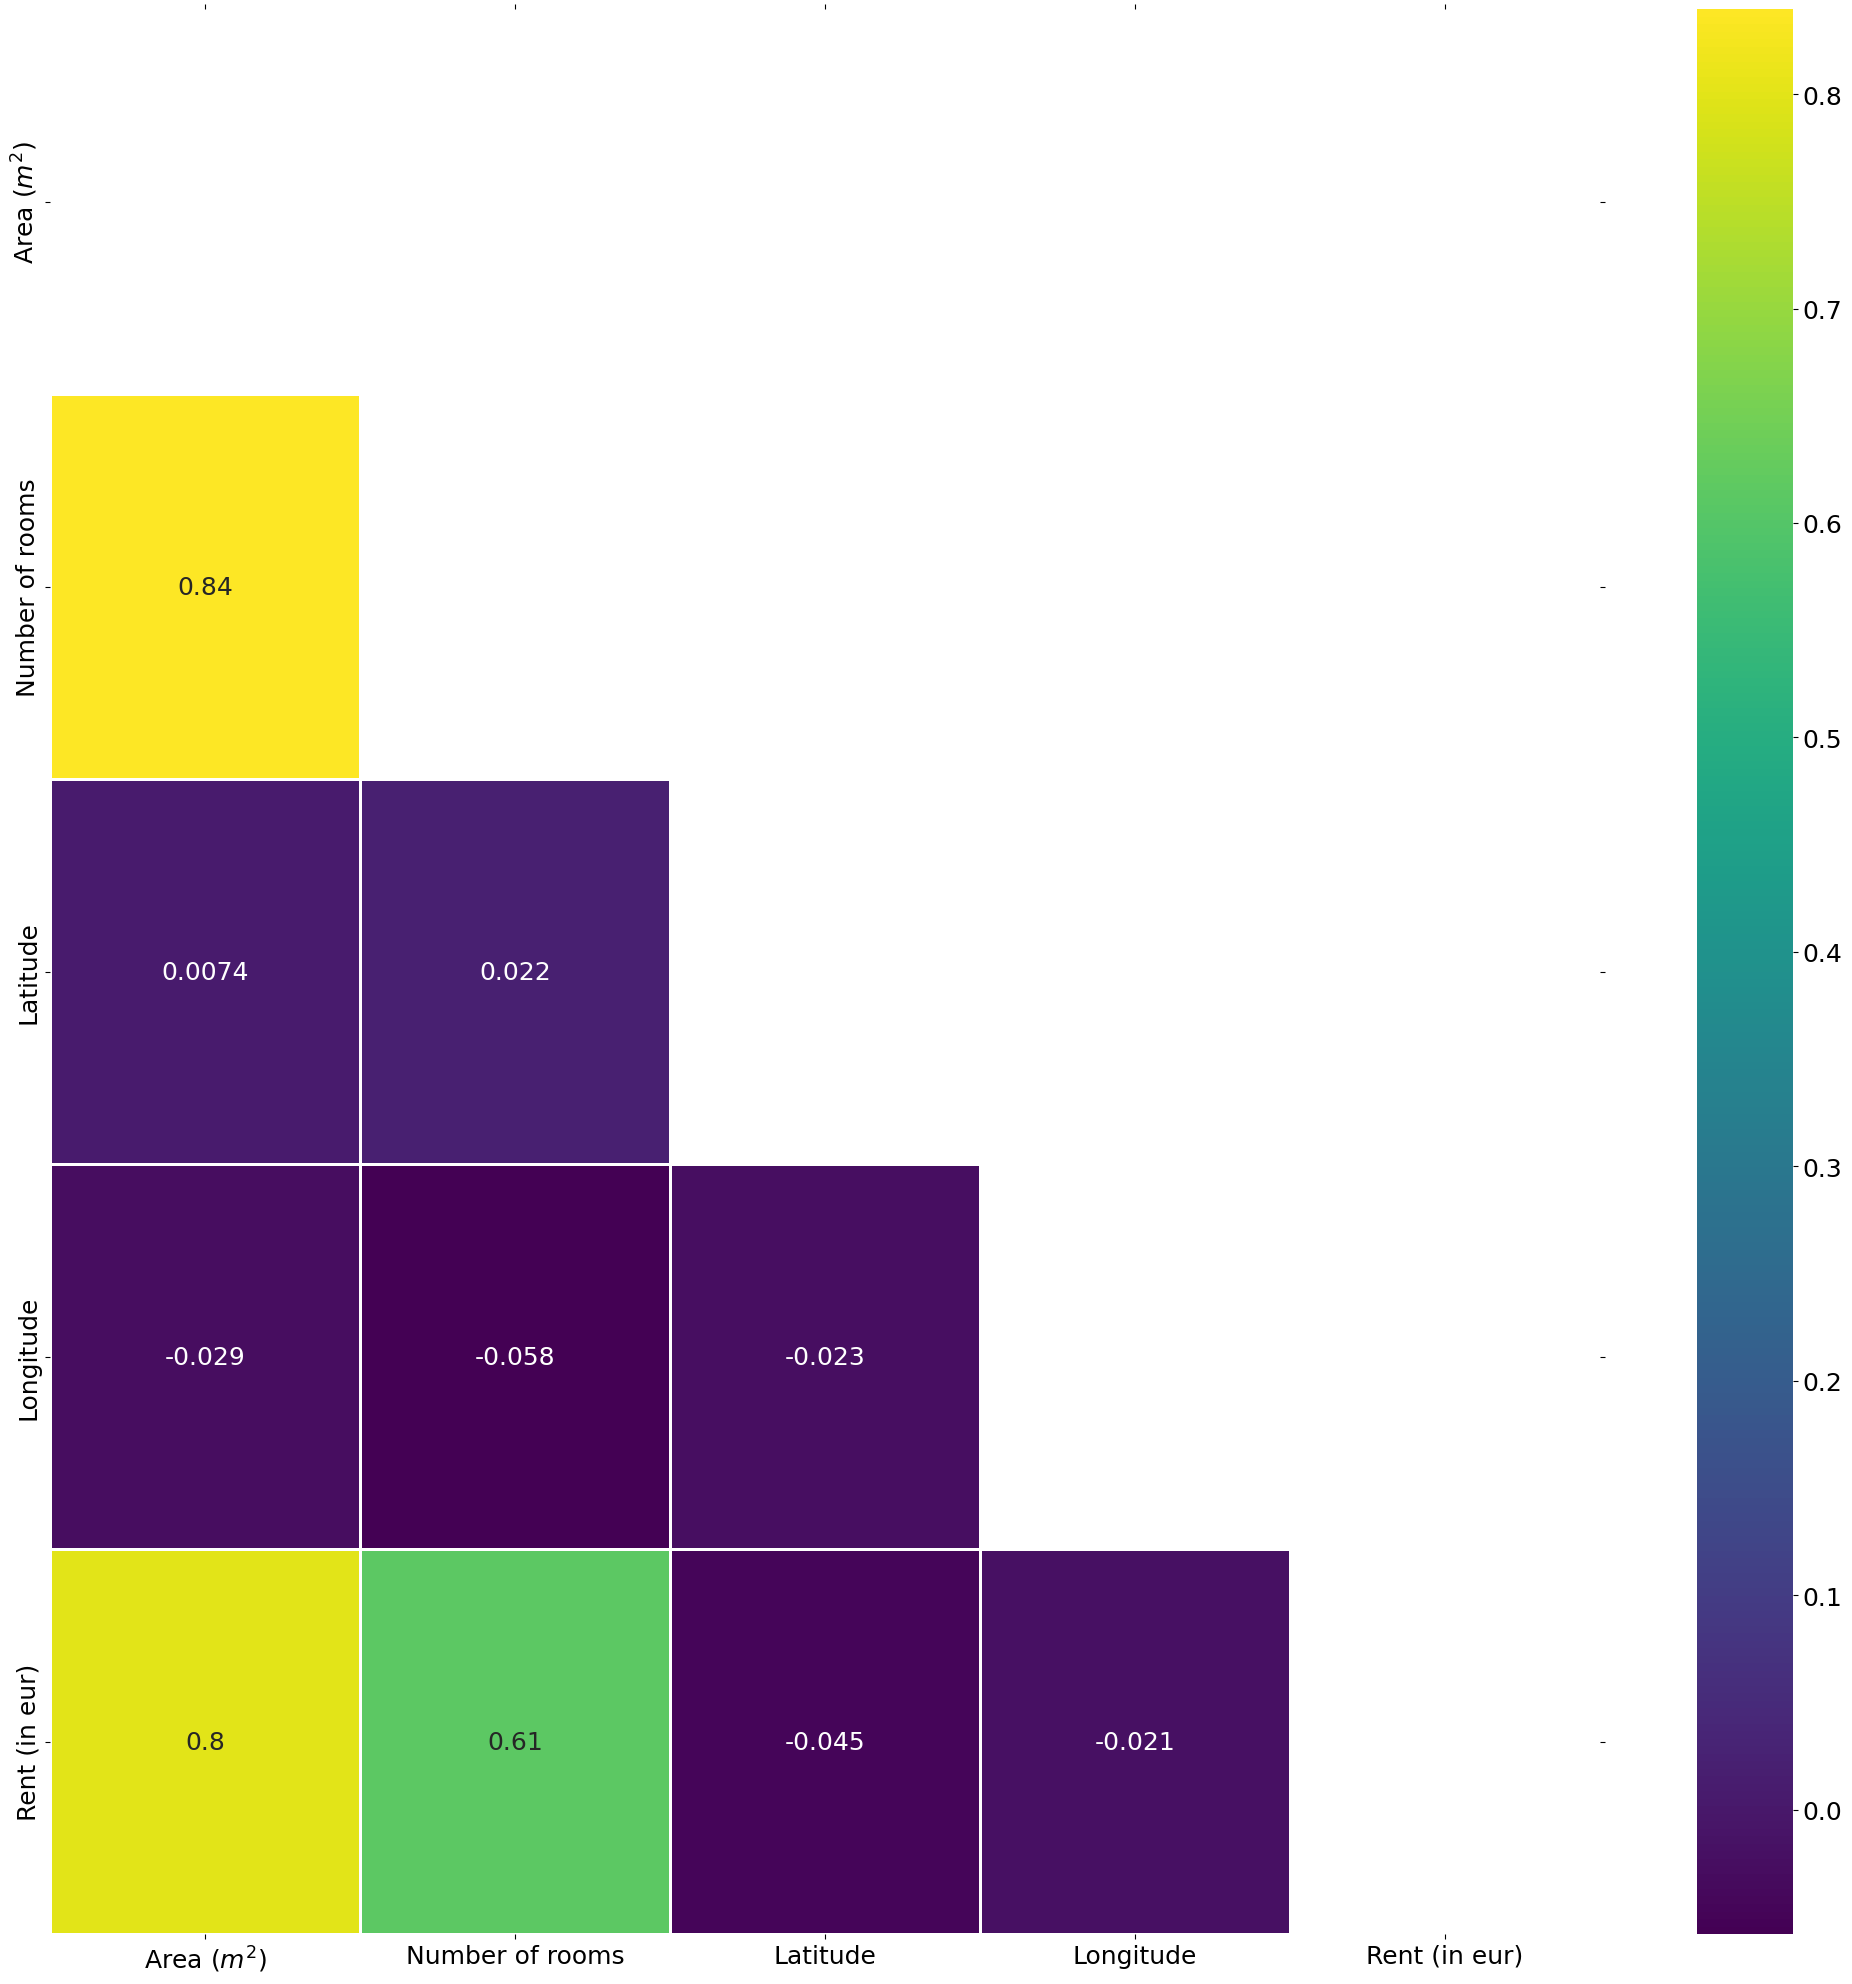

In [49]:
# correlation plot
plt.figure(figsize=(25, 25))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis")
plt.show();

- Rent has high correlation from Area and Number of rooms. We can use this two as the features for modelling

In [50]:
#list the column names
df.columns

Index(['Area ($m^2$)', 'Number of rooms', 'Latitude', 'Longitude',
       'Rent (in eur)'],
      dtype='object')

In [51]:
# check the unique values of Number of rooms since its a catagorical variable
#checking the unique values in the below columns with dtype= int/float
print(df['Number of rooms'].unique())
print(df['Number of rooms'].nunique())

[1.  2.  2.5 3.  1.5 4.5 5.  5.5 3.5 4.  6. ]
11


Catagorical variable has to be converted to numerical varibale using One-hot encoding or by dummy variables

In [65]:
#creating dummy variables
df_new = pd.get_dummies(df, columns = ['Number of rooms'], drop_first=True)
df_new.head()

,Area ($m^2$),Latitude,Longitude,Rent (in eur),Number of rooms_1.5,Number of rooms_2.0,Number of rooms_2.5,Number of rooms_3.0,Number of rooms_3.5,Number of rooms_4.0,Number of rooms_4.5,Number of rooms_5.0,Number of rooms_5.5,Number of rooms_6.0
0,45.43,53.571509,10.012736,995.0,0,0,0,0,0,0,0,0,0,0
1,51.86,53.483600,10.125000,1135.0,0,1,0,0,0,0,0,0,0,0
2,45.64,53.492292,9.996217,1118.0,0,1,0,0,0,0,0,0,0,0
3,52.07,53.542913,9.995835,1275.0,0,1,0,0,0,0,0,0,0,0
4,57.25,53.596390,10.003832,1374.0,0,1,0,0,0,0,0,0,0,0


In [66]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area ($m^2$)         858 non-null    float64
 1   Latitude             858 non-null    float64
 2   Longitude            858 non-null    float64
 3   Rent (in eur)        858 non-null    float64
 4   Number of rooms_1.5  858 non-null    uint8  
 5   Number of rooms_2.0  858 non-null    uint8  
 6   Number of rooms_2.5  858 non-null    uint8  
 7   Number of rooms_3.0  858 non-null    uint8  
 8   Number of rooms_3.5  858 non-null    uint8  
 9   Number of rooms_4.0  858 non-null    uint8  
 10  Number of rooms_4.5  858 non-null    uint8  
 11  Number of rooms_5.0  858 non-null    uint8  
 12  Number of rooms_5.5  858 non-null    uint8  
 13  Number of rooms_6.0  858 non-null    uint8  
dtypes: float64(4), uint8(10)
memory usage: 35.3 KB


In [67]:
df_new.shape

(858, 14)

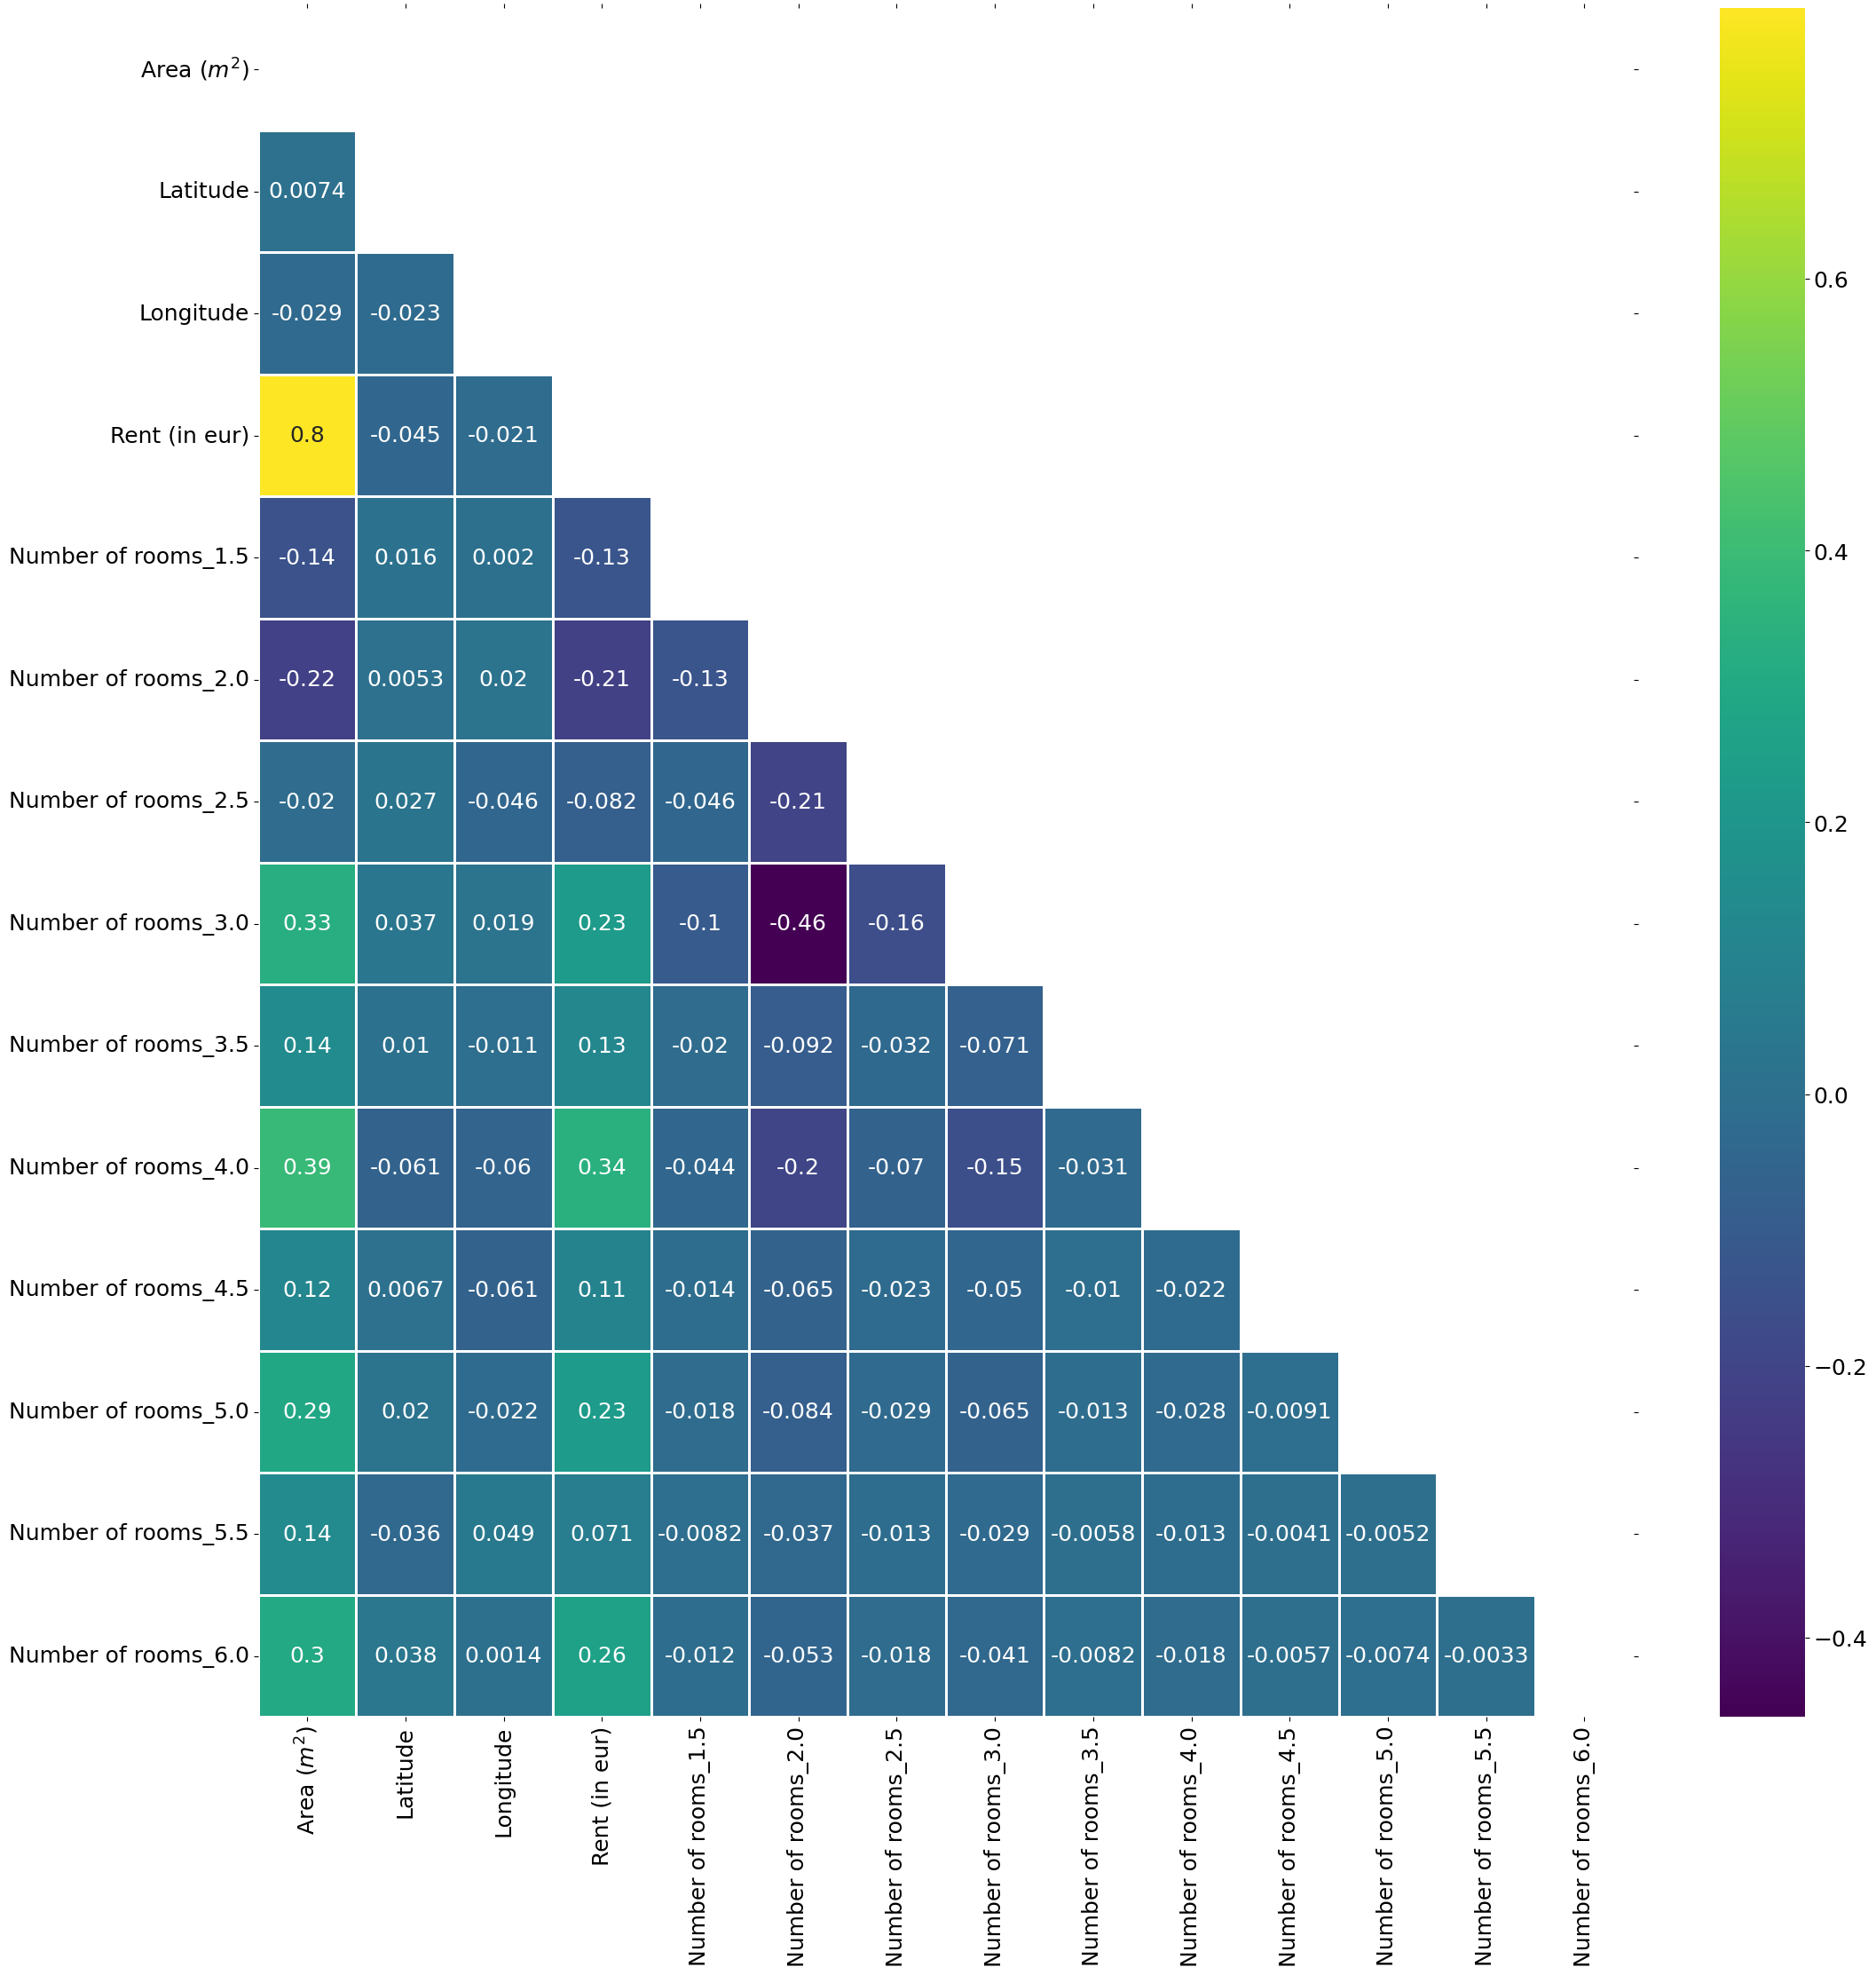

In [68]:
#check the correlation again using new dataframe
# correlation plot
plt.figure(figsize=(25, 25))
matrix = np.triu(df_new.corr())
sns.heatmap(df_new.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis")
plt.show();

- We can see that out of the dummy variable, no. of rooms 6, 5, 4, 3 has the highest positive correlation with the target variable Rent. So lets just only take that one as the features in the modelling

# Modelling

In [70]:
df_new.columns

Index(['Area ($m^2$)', 'Latitude', 'Longitude', 'Rent (in eur)',
       'Number of rooms_1.5', 'Number of rooms_2.0', 'Number of rooms_2.5',
       'Number of rooms_3.0', 'Number of rooms_3.5', 'Number of rooms_4.0',
       'Number of rooms_4.5', 'Number of rooms_5.0', 'Number of rooms_5.5',
       'Number of rooms_6.0'],
      dtype='object')

In [72]:
#select only the useful columns and save it as a new dataframe
cols=['Area ($m^2$)', 'Number of rooms_3.0', 'Number of rooms_4.0', 
'Number of rooms_5.0', 'Number of rooms_6.0', 'Rent (in eur)']
rent_df=df_new[cols]
print(rent_df.columns)
print(rent_df.shape)

Index(['Area ($m^2$)', 'Number of rooms_3.0', 'Number of rooms_4.0',
       'Number of rooms_5.0', 'Number of rooms_6.0', 'Rent (in eur)'],
      dtype='object')
(858, 6)


In [74]:
#train test split
target = 'Rent (in eur)'
X = rent_df.drop(target, axis=1)
y = rent_df.loc[:,target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=RSEED, shuffle=False)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

#Scaling the data with the features that has to be scaled: Here only Area
scaler= StandardScaler()
col_names = ['Area ($m^2$)' ]
X_train_num=X_train[col_names].copy()

X_train[col_names] = scaler.fit_transform(X_train[col_names])
X_test[col_names] = scaler.transform(X_test[col_names])

X_train shape: (600, 5)
y_train shape: (600,)
X_test shape: (258, 5)
y_test shape: (258,)


### Evaluation matrics

- RMSE, MSE, MAE, R2 .. these are the evaluation matric that are normally used for a regression problem. 
- Lets use RMSE as the matric here. The smaller the value, the better the model in that case

### Baseline model

- Its always good to create a baseline model before jumping to modelling with all the features or using ML models
- Baseline model helps to compare the performance of other models with a simple model, so that you know how much the model has improved.
- In regression problems, the best baseline model is a simple linear regression
- Also a baseline model should be the one which can be simple, understood by anyone who doesn't know anything about ML or so.

In this problem, I will use a linear regression as a baseline model with the feature 'Area' or all the useful features.
- Because from the correlation plot its obvious that these are the feature which relates to the target very much. So lets take only that for the baseline model

In [78]:
#choose the column for baseline model
model_base = LinearRegression()
model_base.fit(X_train, y_train)
#prediction on train data
train_base_pred = model_base.predict(X_train)
#prediction on test data
test_base_pred = model_base.predict(X_test)

In [81]:
#evaluate the model :use squared  = False inside the MSE to get RMSE
rmse_train_base =  mean_squared_error(y_train, train_base_pred, squared=False).round(2)
rmse_test_base = mean_squared_error(y_test, test_base_pred, squared=False).round(2)
print('RMAE-train-baseline:', rmse_train_base)
print('RMSE-test-baseline', rmse_test_base)

RMAE-train-baseline: 359.26
RMSE-test-baseline 376.03


- Here the rmse value of baseline model on test data (376) is higher compared to that on train data, <br> which means there is overfitting. But this is a baseline model and thats okay. Lets look in to complex models and see the performance

### Complex models

Lets create a linear regression with polynomial features and see the performance 

In [83]:
#Polynomial function of degree 2
#Fitting the polynomial function to the features in train and test data
poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

In [88]:
#fit the linear model on the polynomial features
model2 = linear_model.LinearRegression()

model2.fit(X_train_poly2, y_train)
train_pol_pred2 = model2.predict(X_train_poly2)
test_pol_pred2 = model2.predict(X_test_poly2)

In [90]:
# Evaluting model
rmse_train2 =  mean_squared_error(y_train, train_pol_pred2, squared=False).round(2)
rmse_test2 = mean_squared_error(y_test, test_pol_pred2, squared=False).round(2)
print('RMSE-train-poly:', rmse_train2)
print('RMSE-test-poly', rmse_test2)

RMSE-train-poly: 341.68
RMSE-test-poly 367.43


- RMSE from test data here is 367.43 which is less than than that we got from the baseline model which was 376.03.
- That means our model is better than the baseline model. But there is overfitting happend in this polynomial model itself if you compare its train and test rmse values. Because the value that we got on train data here is 341.68 which is less than that we got from the test data 
### Solutions
- We can do a gridsearch to find the best parameters from this polynomial model and choose that as the variables for another model
- Or use more ML models like Random forest regressor or XGB regressor or ANN and see the performance on train and test and compare it with the baseline model
- Try scaling other features and check the performances

### random forest

In [92]:
# random forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train) 

RandomForestRegressor(random_state=42)

In [94]:
#performance
train_rf_predictions = model_rf.predict(X_train)
test_rf_predictions = model_rf.predict(X_test)

In [95]:
# Evaluting model
rmse_train_RF =  mean_squared_error(y_train, train_rf_predictions, squared=False).round(2)
rmse_test_RF = mean_squared_error(y_test, test_rf_predictions, squared=False).round(2)
print('RMSE-train-RF:', rmse_train_RF)
print('RMSE-test-RF', rmse_test_RF)

RMSE-train-RF: 206.71
RMSE-test-RF 414.32


- Here you can see clear overfitting on the data
- Eventhough the model performed vrywell on traindata, it doesn't learnt much, and hence the performance is bad on test data
- Lets go for a grid search using RF

In [99]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, cv = 3, 
                        n_iter = 10, verbose = 5, random_state=42)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 2/3] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.527 total time=   0.0s
[CV 1/3] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.540 total time=   0.0s
[CV 3/3] END bootstrap=False, max_depth=13, max_features=0.6, max_leaf_nodes=36, min_samples_split=10, n_estimators=48;, score=0.548 total time=   0.0s
[CV 2/3] END bootstrap=False, max_depth=17, max_features=0.6, max_leaf_nodes=46, min_samples_split=2, n_estimators=134;, score=0.522 total time=   0.1s
[CV 1/3] END bootstrap=False, max_depth=17, max_features=0.6, max_leaf_nodes=46, min_samples_split=2, n_estimators=134;, score=0.512 total time=   0.1s
[CV 3/3] END bootstrap=False, max_depth=17, max_features=0.5, max_leaf_nodes=18, min_samples_split=10, n_estimators=149;, score=0.553 total time=   0.1s
[CV 2/3] END bootstrap=Fal

/Users/haritharetnakaran/Documents/Data_Science_Python_notebooks/Rent prediction wt linear regression-Hamburg-2022-July/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haritharetnakaran/Documents/Data_Science_Python_notebooks/Rent prediction wt linear regression-Hamburg-2022-July/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haritharetnakaran/Documents/Data_Science_Python_notebooks/Rent prediction w

[CV 3/3] END bootstrap=False, max_depth=19, max_features=0.5, max_leaf_nodes=45, min_samples_split=2, n_estimators=200;, score=0.486 total time=   0.2s
[CV 3/3] END bootstrap=True, max_depth=14, max_features=auto, max_leaf_nodes=31, min_samples_split=2, n_estimators=157;, score=0.539 total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, max_leaf_nodes=17, min_samples_split=2, n_estimators=172;, score=0.557 total time=   0.2s
[CV 2/3] END bootstrap=True, max_depth=14, max_features=auto, max_leaf_nodes=31, min_samples_split=2, n_estimators=157;, score=0.601 total time=   0.2s
[CV 1/3] END bootstrap=True, max_depth=14, max_features=auto, max_leaf_nodes=31, min_samples_split=2, n_estimators=157;, score=0.535 total time=   0.2s
[CV 2/3] END bootstrap=False, max_depth=5, max_features=0.6, max_leaf_nodes=19, min_samples_split=10, n_estimators=91;, score=0.572 total time=   0.1s
[CV 1/3] END bootstrap=False, max_depth=5, max_features=0.6, max_leaf_nodes=19, min_sampl

/Users/haritharetnakaran/Documents/Data_Science_Python_notebooks/Rent prediction wt linear regression-Hamburg-2022-July/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haritharetnakaran/Documents/Data_Science_Python_notebooks/Rent prediction wt linear regression-Hamburg-2022-July/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/haritharetnakaran/Documents/Data_Science_Python_notebooks/Rent prediction w

[CV 1/3] END bootstrap=True, max_depth=17, max_features=0.7, max_leaf_nodes=49, min_samples_split=10, n_estimators=196;, score=0.544 total time=   0.1s
[CV 2/3] END bootstrap=True, max_depth=17, max_features=0.7, max_leaf_nodes=49, min_samples_split=10, n_estimators=196;, score=0.576 total time=   0.1s
[CV 3/3] END bootstrap=True, max_depth=17, max_features=0.7, max_leaf_nodes=49, min_samples_split=10, n_estimators=196;, score=0.572 total time=   0.1s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=42, verbose=5)

In [101]:
#list the best parameters
rs.best_params_

{'n_estimators': 172,
 'min_samples_split': 2,
 'max_leaf_nodes': 17,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [102]:
#use best RF model
best_model = rs.best_estimator_

In [103]:
train_rf_predictions_rand = best_model.predict(X_train)

test_rf_predictions_rand = best_model.predict(X_test)

In [104]:
# Evaluting model
rmse_train_RF_RS =  mean_squared_error(y_train, train_rf_predictions_rand, squared=False).round(2)
rmse_test_RF_RS = mean_squared_error(y_test, test_rf_predictions_rand, squared=False).round(2)
print('RMSE-train-RF_best:', rmse_train_RF_RS)
print('RMSE-test-RF_best', rmse_test_RF_RS)

RMSE-train-RF_best: 314.96
RMSE-test-RF_best 374.77


- We can see that the model has become better compared to before. But is not good as the baseline model
- May be further analysis needed on the parameters
- Try other models
- May be feature engineering can help

## Importing the model for regression

In [55]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [56]:
# Features
area = df['Area ($m^2$)']
rooms  =df['Number of rooms']
latitude = df['Latitude']
longitude = df['Latitude']
x_full = np.stack((area, rooms, latitude, longitude), axis=1)
# --------------------------------------------------------------------
# Output
rent = df['Rent (in eur)']
y_full = rent

In [57]:
x_train = x_full[:700,:]
y_train = y_full[:700]

In [58]:
scalar = StandardScaler()
x_train_norm = scalar.fit_transform(x_train)

In [59]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(x_train_norm, y_train)
print(sgdr)
print(f"Number of iterations completed: {sgdr.n_iter_}, Number of weight updates: {sgdr.t_}")
print(sgdr.score(x_train_norm, y_train))

SGDRegressor(max_iter=10000)
Number of iterations completed: 34, Number of weight updates: 23801.0
0.6384559833267685


## Predicting the rent

In [60]:
x_test = x_full[700:,:]
y_test = y_full[700:]
x_test_norm = scalar.fit_transform(x_test)
ypred = sgdr.predict(x_test_norm)

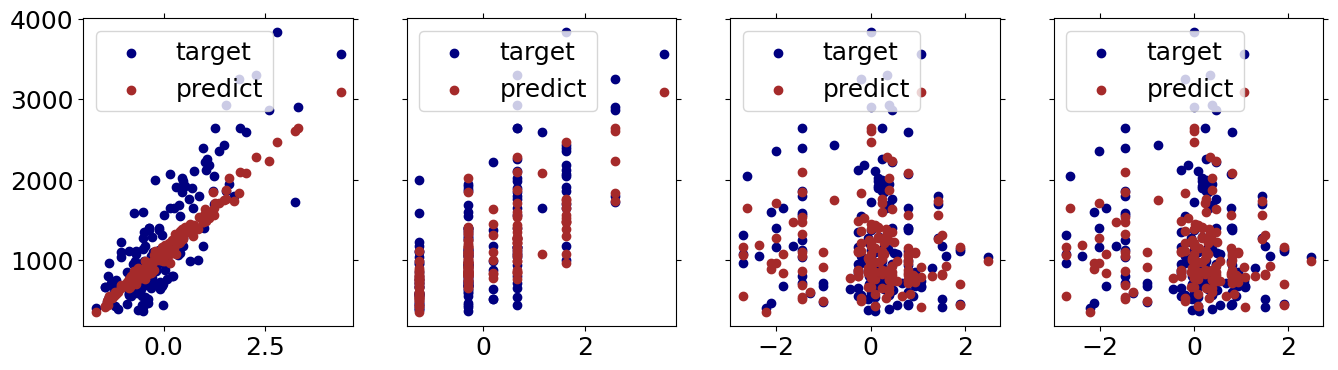

In [61]:
fig1,ax1=plt.subplots(1,4,figsize=(16,4),sharey=True)
for i in range(len(ax1)):
    ax1[i].scatter(x_test_norm[:,i],y_test, label = 'target')
    ax1[i].scatter(x_test_norm[:,i],ypred, label = 'predict')
    ax1[i].legend();

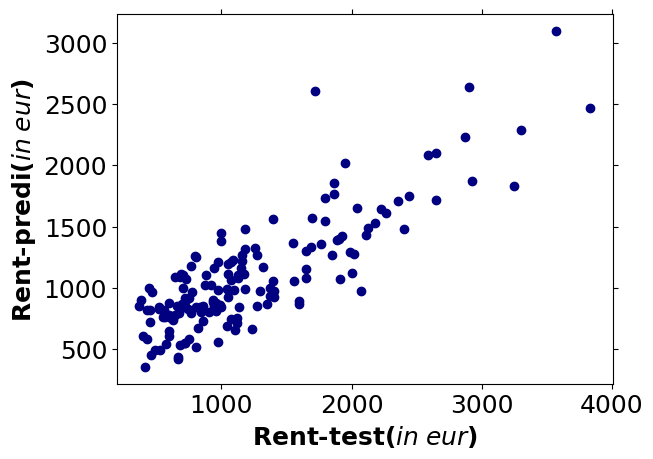

In [62]:
fig4, ax4 = plt.subplots()
ax4.scatter(y_test,ypred)
ax4.set_xlabel('Rent-test($in\;eur$)')
ax4.set_ylabel('Rent-predi($in\;eur$)')
plt.savefig('model_performance.png', bbox_inches = 'tight')

## Assessing the perfomance of the model

In [63]:
sgdr.score(x_test_norm, y_test)

0.6384921951541358

In [ ]:
import location_finder as lf


def rent_estimator(area, n_rooms, loc='Bahrenfeld, Hamburg'):
    lat, long = lf.location_finder(loc)
    x_test_i = np.array([area, n_rooms, lat, long]).reshape(1,4)
    x_test_norm_i = scalar.fit_transform(x_test_i)
    ypred_i = sgdr.predict(x_test_norm_i)
    return ypred_i[0]

rent_estimator(50,1.5)